<a href="https://colab.research.google.com/github/EstiAsmareta/dataset-sentimen-analisis/blob/main/RNN_NLP_CATEGORICAL_SENTIMEN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk

OOV_TOKEN = "<OOV>"

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EstiAsmareta/dataset-sentimen-analisis/main/Book1.csv", encoding='latin1')
df.head()

,komentar,labels
0,Checkout sore langsung dikerjakan oleh adminny...,1
1,"pelayanan nya gercep , penjual fast respon ban...",1
2,"Hasil joss, penjual sabar, revisi tidak dibata...",1
3,Terima kasih pelayanannya...sampai revisi 5x l...,1
4,"Desainnya cepat, admin nya ramah. Hasilnya bag...",1


In [4]:
df = df.rename(columns={'komentar': 'sentences'})
df = df.rename(columns={'labels': 'label'})

In [5]:
df.head()

,sentences,label
0,Checkout sore langsung dikerjakan oleh adminny...,1
1,"pelayanan nya gercep , penjual fast respon ban...",1
2,"Hasil joss, penjual sabar, revisi tidak dibata...",1
3,Terima kasih pelayanannya...sampai revisi 5x l...,1
4,"Desainnya cepat, admin nya ramah. Hasilnya bag...",1


In [6]:
df_lain = pd.read_csv("https://raw.githubusercontent.com/ShinyQ/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-LSTM/main/data/classifiedV1/dana_cs.csv")
df_lain.head()

,raw,processed,predict
0,Saya sangat kecewa dengan dana. Transaksi tran...,kecewa dana transaksi transfer rekening baca t...,-1
1,"Dari 2018 sampai skg menggunakan dana, baru ka...",menggunakan dana kali kecewa transfer rekening...,-1
2,Aplikasi sampah!!! Uang gua ketahan (menunggu)...,aplikasi sampah uang ketahan menunggu gara tf ...,-1
3,Saya sudah kirim email prihal pelepasan akun p...,kirim email prihal pelepasan akun premium pros...,-1
4,Parah sekali untuk responnya. Seharusnya untuk...,parah untuk responnya untuk aplikasi memperker...,-1


In [7]:
df_lain = df_lain.rename(columns={'predict': 'label'})
df_lain = df_lain.rename(columns={'raw': 'sentences'})

df_lain.head()

,sentences,processed,label
0,Saya sangat kecewa dengan dana. Transaksi tran...,kecewa dana transaksi transfer rekening baca t...,-1
1,"Dari 2018 sampai skg menggunakan dana, baru ka...",menggunakan dana kali kecewa transfer rekening...,-1
2,Aplikasi sampah!!! Uang gua ketahan (menunggu)...,aplikasi sampah uang ketahan menunggu gara tf ...,-1
3,Saya sudah kirim email prihal pelepasan akun p...,kirim email prihal pelepasan akun premium pros...,-1
4,Parah sekali untuk responnya. Seharusnya untuk...,parah untuk responnya untuk aplikasi memperker...,-1


In [8]:
df_lain.count()

sentences    610
processed    610
label        610
dtype: int64

In [9]:
df_lain1 = pd.read_csv("https://raw.githubusercontent.com/wandalistathea/analisis_sentimen_tokopedia/main/Data%20Oke%20Setelah%20Di-Stemming%20(Masing2%203k).csv")
df_lain1.head()

,content,score,sentimen,content_clean
0,Aku meh donwload lagu malah metu link mengkene,1,0,meh download lagu metu link mengkene
1,"Saya turunkan, disaat kayak gini ovo paylater ...",1,0,turun ovo paylater cekek lunas total bulan tak...
2,bagus,3,0,bagus
3,Saya membeli pelatihan membuat dan menjual mas...,3,0,beli latih jual masker kain lawan virus corona...
4,Toko pedia ngpusi,1,0,tokopedia ngpusi


In [10]:
df_lain1['label'] = df_lain1['sentimen'].replace({0: -1})
print(df_lain1)

                                                content  score  sentimen  \
0        Aku meh donwload lagu malah metu link mengkene      1         0   
1     Saya turunkan, disaat kayak gini ovo paylater ...      1         0   
2                                                 bagus      3         0   
3     Saya membeli pelatihan membuat dan menjual mas...      3         0   
4                                     Toko pedia ngpusi      1         0   
...                                                 ...    ...       ...   
5995  Sangat menarik tempat beli online untuk ikut p...      5         1   
5996  Trimakasih tokopedia . Sukses selalu. Trimakas...      5         1   
5997                                             Mangap      5         1   
5998  Terima kasih toko pedia, berkat apl ini saya s...      5         1   
5999                                         Jos pokoke      4         1   

                                          content_clean  label  
0                  meh

In [11]:
df_lain1 = pd.DataFrame(df_lain1)
df_lain1 = df_lain1.rename(columns={'content':'sentences'})
df_lain1.columns

Index(['sentences', 'score', 'sentimen', 'content_clean', 'label'], dtype='object')

In [12]:
df_lain2 = pd.read_csv('https://raw.githubusercontent.com/ridife/dataset-idsa/master/Indonesian%20Sentiment%20Twitter%20Dataset%20Labeled.csv', delimiter='\t')
df_lain2.head()

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


In [13]:
df_lain2 = df_lain2.rename(columns={'sentimen':'label'})
df_lain2 = df_lain2.rename(columns={'Tweet':'sentences'})
(df_lain2.head())

,label,sentences
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


In [14]:
df_lain2['label'].value_counts()

label
 0    5327
-1    2887
 1    2592
Name: count, dtype: int64

In [15]:
df_lain3 = pd.read_csv('https://raw.githubusercontent.com/kaenova/Analisis-Sentimen-Aplikasi-Dompet-Digital-Indonesia-Menggunakan-Metode-CNN-Dan-LSTM/main/data/manualLabelV1/FinalLabel.csv')
df_lain3.head()

,raw,processed,labels
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [16]:
df_lain3 = df_lain3.rename(columns={'raw':'sentences'})
df_lain3 = df_lain3.rename(columns={'labels':'label'})
df_lain3.head()

,sentences,processed,label
0,Mau ganti nomer akun dana lama no nya hilang s...,ganti nomer akun dana no hilang email whatsapp...,-1
1,Ketauan pake yang lain teman2 pake dana susah ...,ketahuan pakai teman pakai dana susah banget t...,-1
2,"aneh, verifikasi KTP. katanya KTP gua palsu. S...",aneh verifikasi ktp katanya ktp palsu sim pals...,-1
3,Gwe kirim ke req masih proses belum ada konfir...,kirim request proses konfirm masuk pihak dana ...,-1
4,gimana nih pihak ovo udah 1x24 jam saya ngisi ...,pihak ovo jam mengisi pulsa pelanggan masuk ga...,-1


In [17]:
print(df_lain3.count())
print(df_lain3['label'].value_counts())

sentences    201
processed    201
label        201
dtype: int64
label
-1    169
 1     32
Name: count, dtype: int64


In [18]:
from sklearn.utils import shuffle

# df_gabung   = pd.concat([df_lain2])
df_gabung   = pd.concat([df, df_lain, df_lain1, df_lain2, df_lain3])
df_gabung =shuffle(df_gabung)
df_gabung = df_gabung.reset_index(drop=True)

In [19]:
df = df_gabung

In [20]:
print(df_gabung.head())
print(df_gabung.count())

                                           sentences  label processed  score  \
0  salah kamu itu mah yaudah cari orang lain lg a...      0       NaN    NaN   
1  ketua dpw pkbulteng sahabat amin tahir melapor...      0       NaN    NaN   
2  bende ni buat aku teringat dekat kucing aku yg...      0       NaN    NaN   
3  kenapa yg sibuk nak tutup tahfiz tu dilabel se...     -1       NaN    NaN   
4                          Tokopediaaa sarangeeee💜✌🏼      1       NaN    5.0   

   sentimen           content_clean  
0       NaN                     NaN  
1       NaN                     NaN  
2       NaN                     NaN  
3       NaN                     NaN  
4       1.0  tokopediaaa sarangeeee  
sentences        17910
label            17910
processed          811
score             6000
sentimen          6000
content_clean     5654
dtype: int64


In [21]:
df['label'].value_counts()

label
-1    6717
 1    5791
 0    5402
Name: count, dtype: int64

In [22]:
df.dtypes

sentences         object
label              int64
processed         object
score            float64
sentimen         float64
content_clean     object
dtype: object

# **PRA_PEMROSESAN DATA**

In [23]:
import re
#menghapus RT
df.sentences = df.sentences.str.replace(r'RT', '')
#menghapus \n
df.sentences = df.sentences.str.replace(r'\n', '')
#menghapus link
df.sentences = df.sentences.str.replace(r'https?:\/\/.*[\r\n]*',' ')
#menghapus tanda mata uang dolar dll
df.sentences = df.sentences.str.replace(r'\$\w*',' ')

In [24]:
#lower case semua text
df['sentences'] = df['sentences'].str.lower()

In [25]:
#melihat 5 data paling bawah
df.tail()

,sentences,label,processed,score,sentimen,content_clean
17905,idm hallo ami tolobg bantu ya huhu ini aku mas...,-1,NaN,NaN,NaN,NaN
17906,weh kejadian memalukan kt rnr gambang aku sala...,0,NaN,NaN,NaN,NaN
17907,suka,1,NaN,5.0,1.0,suka
17908,apakah pemakayan kuota boros untuk membuka apl...,1,NaN,5.0,1.0,pemakayan kuota boros buka aplikasi
17909,lumayan buat menyalurkan hobby ....belanja,1,NaN,5.0,1.0,lumayan salur hobby belanja


In [26]:
#melihat isi tweet pertama
df.iloc[1]

sentences        ketua dpw pkbulteng sahabat amin tahir melapor...
label                                                            0
processed                                                      NaN
score                                                          NaN
sentimen                                                       NaN
content_clean                                                  NaN
Name: 1, dtype: object

# **SPLIT THE DATA**

In [27]:
import random  # Menambahkan impor modul random

MAX_EXAMPLE = df['sentences'].count()
sentences_and_labels = list(zip(df['sentences'], df['label']))

random.seed(32)
sentences_and_labels = random.sample(sentences_and_labels, MAX_EXAMPLE)

df['sentences'], df['label'] = zip(*sentences_and_labels)

print(f"There are {len(df['sentences'])} sentences and {len(df['label'])} labels after random sampling\n")

There are 17910 sentences and 17910 labels after random sampling



In [28]:
def train_val_split(sentences, labels, training_split):
  train_size = int(len(sentences) * training_split)

  # Split the sentences and labels into train/validation splits
  train_sentences = sentences[:train_size]
  train_labels = labels[:train_size]

  validation_sentences = sentences[train_size:]
  validation_labels = labels[train_size:]

  return train_sentences, validation_sentences, train_labels, validation_labels

In [29]:
TRAINING_SPLIT = 0.8
train_sentences, val_sentences, train_labels, val_labels = train_val_split(df['sentences'], df['label'], TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 14328 sentences for training.

There are 14328 labels for training.

There are 3582 sentences for validation.

There are 3582 labels for validation.


In [30]:
from tensorflow.keras.utils import to_categorical
encoded_labels = to_categorical(train_labels, num_classes=3)

# **TOKENIZATION - SEQUENCES, TRUNCATE, AND, PADDING**

In [31]:
def fit_tokenizer(train_sentences, oov_token):
  tokenizer = Tokenizer(oov_token=oov_token)
  tokenizer.fit_on_texts(train_sentences)

  return tokenizer

In [32]:
tokenizer = fit_tokenizer(train_sentences, OOV_TOKEN )

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")
print(f"\nindex of word 'aku' should be {word_index['adalah']}")

Vocabulary contains 24654 words

<OOV> token included in vocabulary

index of word 'aku' should be 133


In [33]:
df["sentence_length"] = df["sentences"].apply(len)

In [34]:
print(df["sentence_length"].describe())

count    17910.000000
mean        86.293412
std         74.988957
min          1.000000
25%         33.000000
50%         79.000000
75%        115.000000
max       1014.000000
Name: sentence_length, dtype: float64


In [35]:
EMBEDDING_DIM = 500
MAXLEN = 200
TRUNCATING = 'post'
PADDING = 'post'

In [36]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
  sequences = tokenizer.texts_to_sequences(sentences)
  pad_trunc_sequences = pad_sequences(sequences, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)

  return pad_trunc_sequences

In [37]:
train_pad_trunc_seq = seq_pad_and_trunc(train_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)
val_pad_trunc_seq = seq_pad_and_trunc(val_sentences, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Padded and truncated training sequences have shape: (14328, 200)

Padded and truncated validation sequences have shape: (3582, 200)


In [38]:
# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)

# **DEPLOY MODEL**

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# optimizer.build(model.trainable_variables)  # Added for compatibilityy

def create_model(vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE + 1, EMBEDDING_DIM, input_length=MAXLEN),
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')  # Ubah jumlah neuron output menjadi 3 (positif, negatif, netral)
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [44]:
model = create_model(VOCAB_SIZE,EMBEDDING_DIM,MAXLEN)
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 500)          12327500  
                                                                 
 conv1d_1 (Conv1D)           (None, 198, 64)           96064     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 49, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               197632    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dense_4 (Dense)             (None, 16)               

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Monitor validation loss for early stopping


In [46]:
history = model.fit(train_pad_trunc_seq, encoded_labels, epochs=20, validation_data=(val_pad_trunc_seq, val_labels), callbacks=[early_stopping])

Epoch 1/20
448/448 [==============================] - 28s 52ms/step - loss: 1.5345 - accuracy: 0.3899 - val_loss: 1.1601 - val_accuracy: 0.5008
Epoch 2/20
448/448 [==============================] - 10s 23ms/step - loss: 1.0591 - accuracy: 0.4812 - val_loss: 0.9555 - val_accuracy: 0.5483
Epoch 3/20
448/448 [==============================] - 8s 19ms/step - loss: 0.8854 - accuracy: 0.5771 - val_loss: 0.8784 - val_accuracy: 0.5972
Epoch 4/20
448/448 [==============================] - 7s 16ms/step - loss: 0.7817 - accuracy: 0.6443 - val_loss: 0.8864 - val_accuracy: 0.6103
Epoch 5/20
448/448 [==============================] - 7s 16ms/step - loss: 0.7022 - accuracy: 0.6989 - val_loss: 0.8901 - val_accuracy: 0.6237
Epoch 6/20
448/448 [==============================] - 7s 15ms/step - loss: 0.6211 - accuracy: 0.7517 - val_loss: 0.9486 - val_accuracy: 0.6270
Epoch 7/20
448/448 [==============================] - 7s 15ms/step - loss: 0.5530 - accuracy: 0.7934 - val_loss: 0.9911 - val_accuracy: 0.62

In [47]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

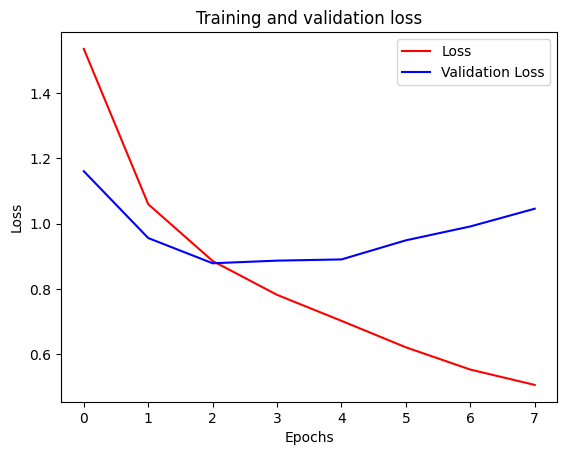

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

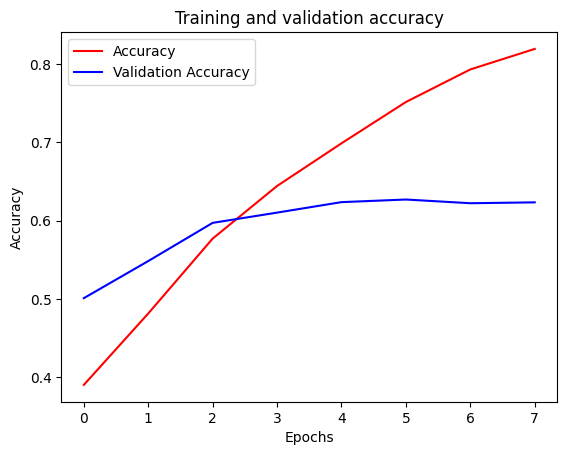

In [49]:
# grader-required-cell

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels for your validation data
y_pred = model.predict(val_pad_trunc_seq)  # Replace with your prediction method
y_true = val_labels.argmax(axis=1)  # Assuming your labels are one-hot encoded

# 'micro': Averages across all classes
precision = precision_score(y_true, y_pred.argmax(axis=1), average='micro')
recall = recall_score(y_true, y_pred.argmax(axis=1), average='micro')
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='micro')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

112/112 [==============================] - 1s 4ms/step
Precision: 0.623
Recall: 0.623
F1-score: 0.623


In [51]:
print(f"Training Accuracy: {max(acc):.3f}")
print(f"Validation Accuracy: {max(val_acc):.3f}")

Training Accuracy: 0.820
Validation Accuracy: 0.627


## **PREDICT GENERATOR TEXT**

In [52]:
model.save('my_sentiment_model.keras')

In [53]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_sentiment_model.keras')

In [54]:
def preprocess_sentence(sentence):
  """Fungsi untuk memproses kalimat input.

  Args:
    sentence: Kalimat yang akan diproses.

  Returns:
    Urutan integer yang mewakili kalimat yang dipreproses.
  """
  # Preprocessing steps (tokenization, padding, truncation)
  tokens = tokenizer.texts_to_sequences([sentence])
  pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
  return pad_trunc_seq[0]


In [69]:
sentence = input("Masukkan kalimat: ")
preprocessed_sentence = preprocess_sentence(sentence)

Masukkan kalimat: Pengerjaannya cepet


In [70]:
prediction = model.predict(np.expand_dims(preprocessed_sentence, axis=0))
predicted_class = prediction.argmax(axis=1)[0]

if predicted_class == 0:
  print("Sentimen: Netral")
elif predicted_class == 1:
  print("Sentimen: Positif")
else:
  print("Sentimen: Negatif")


1/1 [==============================] - 0s 22ms/step
Sentimen: Positif


In [75]:
# Function to preprocess sentence
def preprocess_sentence(sentence):
    """Fungsi untuk memproses kalimat input.

    Args:
        sentence: Kalimat yang akan diproses.

    Returns:
        Urutan integer yang mewakili kalimat yang dipreproses.
    """
    # Preprocessing steps (tokenization, padding, truncation)
    tokens = tokenizer.texts_to_sequences([sentence])
    pad_trunc_seq = pad_sequences(tokens, padding=PADDING, truncating=TRUNCATING, maxlen=MAXLEN)
    return pad_trunc_seq[0]

# Function to predict sentiment
def predict_sentiment(sentences):
    """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

    Args:
        sentences: Daftar kalimat.

    Returns:
        Daftar prediksi sentimen.
    """
    preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
    predictions = model.predict(np.array(preprocessed_sentences))
    predicted_classes = predictions.argmax(axis=1)
    return predicted_classes

# Load data
data = pd.read_excel('uji.xlsx')
sentences = data['raw'].tolist()

# Predict sentiment
predicted_classes = predict_sentiment(sentences)

# Print predictions
for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == 0:
        print(f"Kalimat {i+1}: Sentimen: Netral")
    elif predicted_class == 1:
        print(f"Kalimat {i+1}: Sentimen: Positif")
    else:
        print(f"Kalimat {i+1}: Sentimen: Negatif")

1/1 [==============================] - 0s 20ms/step
Kalimat 1: Sentimen: Positif
Kalimat 2: Sentimen: Positif
Kalimat 3: Sentimen: Netral
Kalimat 4: Sentimen: Netral
Kalimat 5: Sentimen: Positif
Kalimat 6: Sentimen: Negatif


In [86]:
# Function to predict sentiment (unchanged)
def predict_sentiment(sentences):
  """Fungsi untuk memprediksi sentimen dari beberapa kalimat.

  Args:
      sentences: Daftar kalimat.

  Returns:
      Daftar prediksi sentimen.
  """
  preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]
  predictions = model.predict(np.array(preprocessed_sentences))
  predicted_classes = predictions.argmax(axis=1)
  return predicted_classes

# Load data (unchanged)
data = pd.read_excel('uji.xlsx')
sentences = data['raw'].tolist()

# Predict sentiment (unchanged)
predicted_classes = predict_sentiment(sentences)

# Count sentiment labels
sentiment_counts = pd.Series(predicted_classes).value_counts()

# Calculate percentages
total_sentences = len(predicted_classes)
sentiment_percentages = (sentiment_counts / total_sentences) * 100

# Print sentiment distribution
print("Distribusi Sentimen:")
print(sentiment_percentages.to_string())

max_value = sentiment_percentages.max()
max_label = sentiment_percentages.idxmax()

# Print the sentiment label with the highest percentage
print(f"\nSentimen Tertinggi: {max_label} ({max_value:.2f}%)")
print("\n1:Positif 2:Negatif 0:Netral")


1/1 [==============================] - 0s 35ms/step
Distribusi Sentimen:
1    50.000000
0    33.333333
2    16.666667

Sentimen Tertinggi: 1 (50.00%)

1:Positif 2:Negatif 0:Netral
